In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [70]:
import pandas as pd
import numpy as np
import bone
reload(bone)
import Datasets
reload(Datasets)
import Datasets_hh
reload(Datasets_hh)
hu = bone.hu

# Figure 1b

Sun 2025 bpd scblk (n = 24)
LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP9
24 [11, 4, 5, 4] LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP9 LP9
[48]
                            OLS Regression Results                            
Dep. Variable:                    C13   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     4.101
Date:                Tue, 04 Nov 2025   Prob (F-statistic):             0.0594
Time:                        13:37:23   Log-Likelihood:                -36.330
No. Observations:                  11   AIC:                             78.66
Df Residuals:                       8   BIC:                             79.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
            

/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Text(0.5, 1.0, 'LungMap Multivariate')

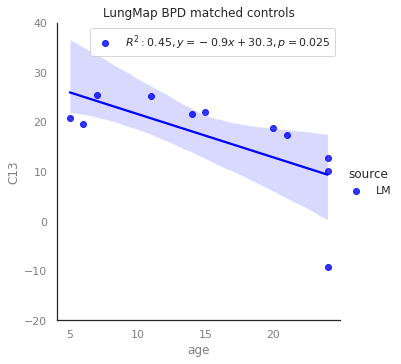

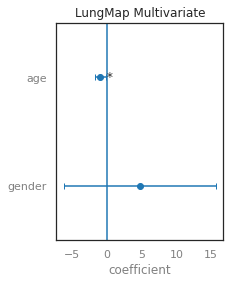

In [50]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getSun2025BPD()
ana.orderData(l1, wt1)
disease = ana.h.getSurvName("c disease")
atype = ana.h.getSurvName('c age')
btype = ana.h.getSurvName('c age-unit')
atype = [str(atype[i])+"-"+str(btype[i]) for i in range(len(atype))]
ahash = {'4-month':4, '5-month':5, '6-month':6, '7-month':7,
'8-month':8, '316-day':10, '11-month':11, '12-month':12,
'13-month':13, '14-month':14, '15-month':15, '18-month':18,
'19-month':19, '20-month':20, '21-month':21, '3-year':24}
age = [ahash[k] if k in ahash else None for k in atype]
sex = ana.h.getSurvName('c sex')
ahash = {'female':1, 'male':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
race = ana.h.getSurvName('c Race/ Ethnicity')
ahash = {'White':0, 'Hispanic':1, 'Black':2}
race_n = [ahash[k] if k in ahash else None for k in race]
ahash = {'White':0, 'Hispanic':0, 'Black':1}
black = [ahash[k] if k in ahash else None for k in race]
ahash = {'White':0, 'Hispanic':1, 'Black':0}
hisp = [ahash[k] if k in ahash else None for k in race]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'LM'
df['race'] = race[2:]
df['eth'] = race_n[2:]
df['black'] = black[2:]
df['hispanic'] = hisp[2:]
df['disease'] = disease[2:]
df1 = df[df['disease'] == 'control']
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_ylim([-20, 40])
ax.set_title("LungMap BPD matched controls")
# pdf.savefig(transparent=True, bbox_inches = 'tight')

plt = bone.plt
dfm = bone.printOLS('C13 ~ age + gender', df1)
df=dfm
df = df.drop(['Intercept'])
df = df.sort_values('pvalues',ascending=False)
plt.figure(figsize=(3,4))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.errorbar(df["coeff"], range(len(df.index)),
    yerr=0,
    xerr=[list(df["coeff"] - df["lower 0.95"]),# list(df["upper 0.95"]),
          list(df["upper 0.95"] - df["coeff"])],
    fmt='o', capsize=3, color='tab:blue')
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df["Name"])
ax.set_xlabel("coefficient")
ax.axvline(x=0, color='tab:blue')
#ax.set_xlim([0, 5.5])
ax.set_ylim([-0.5, len(df.index) - 0.5])
for i in range(len(df.index)):
    ax.text(df["upper 0.95"][i] + 0.1,i, df['codes'][i], verticalalignment='center')
ax.set_title("LungMap Multivariate")
# pdf.savefig(transparent=True, bbox_inches = 'tight')

In [51]:
dfm

,Name,coeff,lower 0.95,upper 0.95,pvalues,codes
Intercept,Intercept,29.115310,15.985817,42.244804,0.000914,***
age,age,-0.934386,-1.697522,-0.171249,0.022374,*
gender,gender,4.735588,-6.226337,15.697513,0.348326,


# Figure 1c

Wang 2020 CoV2 scblk (n = 9)
GSE161382 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV384
9 [3, 3, 3] GSE161382 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV384 COV384
[47]
N vs C 1.08, 0.345
N vs A 1.3, 0.296
C vs A -0.271, 0.808


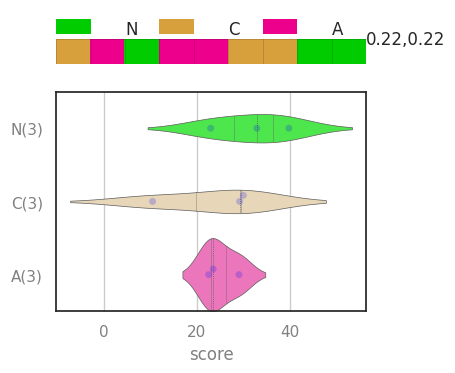

In [47]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getWang2020CoV2scblk(2)
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
ana.printAllPvals()


# Figure 1 d-f

Guo 2022 cellref hs II (n = 148)
LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP17.2
147 [79, 68] LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP17.2 LP17.2
[47]
GTEx_Lung_V8_tpm (n = 578)
GTEx http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=GTEx4
578 [395, 183] GTEx http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=GTEx4 GTEx4
[48]
[5, 'c AGE', '50-59', '60-69', '30-39', '20-29', '40-49', '70-79']
Yang 2020 lung (n = 288)
GSE150910 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV279
288 [103, 103, 82] GSE150910 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV279 COV279
[44]
0.0016311979960330102 0.023111846175584885 6.76368733469422 0.8776869961960068
0.211727388047443 -0.1791735208872991 16.481926767417203 0.04120665566322468


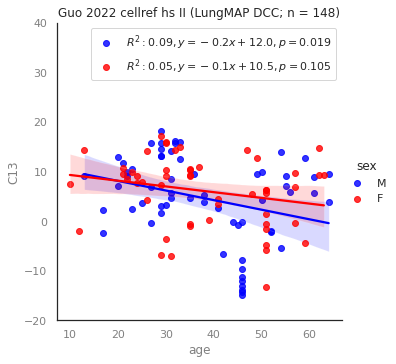

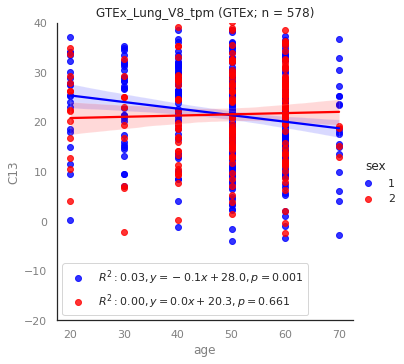

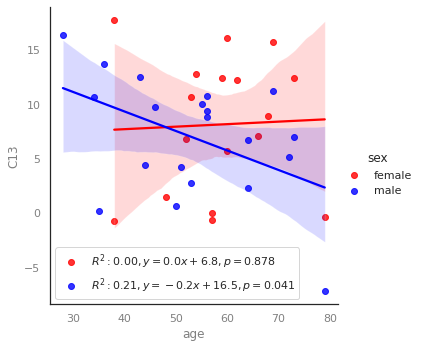

In [74]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.prepareData("LP17.2")
atype = ana.h.getSurvName('c Sex')
ahash = {'female':1, 'male':0, 'F':1, 'M':0}
atypes = ['M', 'F']
ana.initData(atype, atypes, ahash)
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c Age')
ahash = {'c Age', 'NA', ''}
age = [None if k in ahash else float(k) for k in atype]
sex = ana.h.getSurvName('c Sex')
ahash = {'female':1, 'male':0, 'F':1, 'M':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'LM'
df.dropna(inplace=True)
df = df[df['age'] < 65]
g = bone.sns.lmplot(x='age', y='C13', hue='sex', palette=['blue', 'red'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_ylim([-20, 40])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.prepareData("GTEx4", "/Users/aglina/public_html/Hegemon/explore.conf")
atype = ana.h.getSurvName('c SEX')
ahash = {'female':1, 'male':0, 'F':1, 'M':0, '2':1, '1':0}
atypes = ['M', 'F']
ana.initData(atype, atypes, ahash)
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c AGE')
print(hu.uniq(atype))
ahash = {'50-59':50, '60-69':60, '30-39':30, '20-29':20, '40-49':40, '70-79':70}
age = [ahash[k] if k in ahash else None for k in atype]
sex = ana.h.getSurvName('c SEX')
ahash = {'female':1, 'male':0, 'F':1, 'M':0, '2':1, '1':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'GTEx'
df.dropna(inplace=True)
g = bone.sns.lmplot(x='age', y='C13', hue='sex', palette=['blue', 'red'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_ylim([-20, 40])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getYang2020()
ana.orderData(l1, wt1)
disease = ana.h.getSurvName("c diagnosis")
atype = ana.h.getSurvName('c age')
ahash = {'c age', 'NA'}
age = [None if k in ahash else float(k) for k in atype]
sex = ana.h.getSurvName('c Sex')
ahash = {'female':1, 'male':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
atype = ana.h.getSurvName('c ever_smoked')
ahash = {'no':0, 'yes':1}
smoke = [ahash[k] if k in ahash else None for k in atype]
stype = ana.h.getSurvName('c sample type')
inst = ana.h.getSurvName('c institution')
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['smoke'] = smoke[2:]
df['gender'] = sex_n[2:]
df['source'] = 'Y20'
df['disease'] = disease[2:]
df['stype'] = stype[2:]
df['inst'] = inst[2:]
df1 = df[(df['disease'] == 'control') & (df['inst'] == 'PT')]
g = bone.sns.lmplot(x='age', y='C13', hue='sex', palette=['red','blue'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    print(r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)

# Figure 1 g-j

Cao 2023 lung scblk (n = 19)
PMID: 37085732 https://ngdc.cncb.ac.cn/omix/release/OMIX003147 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU28
19 [3, 2, 6, 2, 2, 4] PMID: 37085732 https://ngdc.cncb.ac.cn/omix/release/OMIX003147 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU28 LU28
[47]
Sountoulidis 2023 [human embryonic lung] (n = 13)
GSE215898 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T117
13 [8, 5] GSE215898 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T117 T117
[48]
age  [5, 5.5, 6, 6, 7, 8, 8.5, 10, 11.5, 12, 12, 13, 14]
L_labels :  <a list of 1 Text objects>
g.hue_names : ['LM'] 1
Amy Wong 2024 [hm fetal lung tissue] (n = 20)
GSE264407 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T120
20 [6, 6, 8] GSE264407 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T120 T120
[48]
[None, None, 10.1, 18, 13.6, 11.1, 19.2, 19.4, 15.6, 19, 14.3, 10.2, 18.4, 16.2, 16.5, 18.1, 13.4, 18.3, 18.2, 12.3, 16.1, 15.5]
L_labels :  <a list of 1

Text(0.5, 1.0, 'Guo 2019 lung mm (GSE122331; n = 16)')

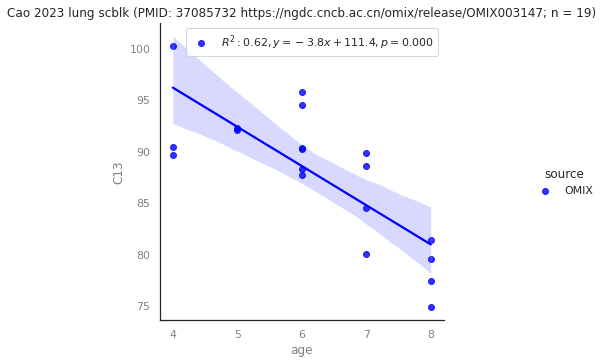

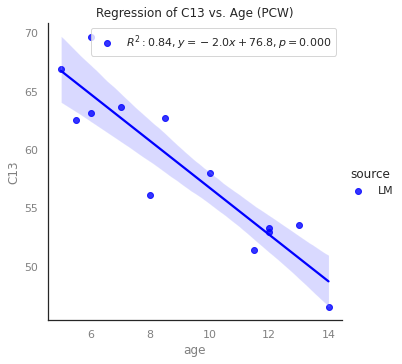

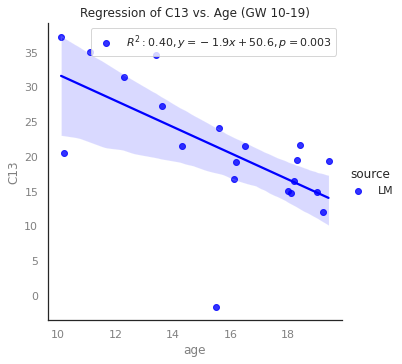

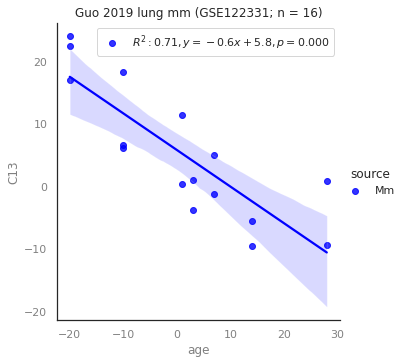

In [72]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getCao2023lungFetal()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c time')
ahash = {'4w':4, '5w':5, '6w':6, '7w':7, '7w+':7, '8w':8}
age = [ahash[k] if k in ahash else None for k in atype]
ahash = {'A', 'A1', 'AA', 'AB', 'AG', 'AH'}
sex = ['male' if k in ahash else 'female' for k in ana.h.headers]
ahash = {'female':1, 'male':0, 'F':1, 'M':0, '2':1, '1':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'OMIX'
#df.dropna(inplace=True)
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
#ax.set_ylim([-20, 100])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getSountoulidis2023EmbryonicLungHM()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age (ch1)')
ahash = {'PCW5': 5, 'PCW5.5': 5.5, 'PCW6': 6, 'PCW7': 7, 'PCW8': 8, 'PCW8.5': 8.5,
        'PCW10': 10, 'PCW11.5': 11.5, 'PCW12': 12,
        'PCW13': 13, 'PCW14': 14}
age = [ahash[k] if k in ahash else None for k in atype]
listage = age[2:]
listage.sort()
print("age ", listage)
sex = ana.h.getSurvName('c gender (ch1)')
ahash = {'female':1, 'male':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'LM'
df['disease'] = "control"
df1 = df[df['disease'] == 'control']
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
print("L_labels : ", L_labels)
print("g.hue_names :", g.hue_names, len(g.hue_names))
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
# ax.set_ylim([-20, 40])
ax.set_title("Regression of C13 vs. Age (PCW)")
# plt.savefig('Sountoulidis_c13_vs_age.pdf',dpi=100, format='pdf',transparent=True, bbox_inches='tight')

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getAmyWong2024fetalLung()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age (ch1)')
ahash = {'GW 10.1': 10.1, 'GW 10.2': 10.2, 'GW 11.1': 11.1, 'GW 12.3': 12.3,
         'GW 13.4': 13.4, 'GW 13.6': 13.6, 'GW 14.3': 14.3, 'GW 15.5 sample 1': 15.5,
         'GW 15.5 sample 2': 15.6, 'GW 16.1': 16.1, 'GW 16.2': 16.2, 'GW 16.5': 16.5, 
         'GW 18': 18, 'GW 18.1': 18.1, 'GW 18.2': 18.2, 'GW 18.1 sample 2A': 18.3,
         'GW 18.1 sample 2B': 18.4, 'GW 19.0': 19, 'GW 19.2': 19.2, 'GW 19.4': 19.4}
age = [ahash[k] if k in ahash else None for k in atype]
print(age)
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'LM'
df['disease'] = "control"
df1 = df[df['disease'] == 'control']
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
print("L_labels : ", L_labels)
print("g.hue_names :", g.hue_names, len(g.hue_names))
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
# ax.set_ylim([-20, 40])
ax.set_title("Regression of C13 vs. Age (GW 10-19)")
# plt.savefig('regression_c13_vs_age.pdf',dpi=100, format='pdf',transparent=True, bbox_inches='tight')

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getGuo2019lungMm()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age')
ahash = {'E16.5':-20, 'E18.5':-10, 'PND1':1, 'PND3':3,
            'PND7':7, 'PND14':14, 'PND28':28}
age = [ahash[k] if k in ahash else None for k in atype]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'Mm'
#df.dropna(inplace=True)
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
# ax.set_ylim([-20, 80])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')
